In [4]:
import pandas as pd
import numpy as np
import gensim
import codecs

In [64]:
from sklearn import svm
from sklearn import metrics
from sklearn.externals import joblib

/work/tcxia/anaconda3/envs/py36_tf2.0/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [6]:
def getWordVecs(wordList,model):
    vecs = []
    for word in wordList:
        word = word.replace('\n','')
        try:
            vecs.append(model[word])
        except KeyError:
            continue
    return np.array(vecs,dtype='float')

def buildVecs(data,model):
    new_vec = []
    for line in data:
        vecs = getWordVecs(line,model)
        if len(vecs) > 0:
            vecsArray = sum(np.array(vecs)) / len(vecs)
            new_vec.append(vecsArray)
    return new_vec

In [35]:
df = pd.read_csv('./data.csv')
content = df['content'].tolist()
sents = [eval(cont) for cont in content]
print(len(sents))
labels = df['label'].tolist()
print(len(labels))

3920
3920


In [33]:
model = gensim.models.KeyedVectors.load_word2vec_format('semi.txt',binary=False)

In [45]:
data_vec = []
data_label = []
for i in range(len(sents)):
    senl= []
    sent = sents[i]
    for word in sent:
        try:
            senl.append(model[word])
        except KeyError:
             continue
    
    sen_arr = np.array(senl,dtype='float')
#     print(sen_arr.shape)
    if sen_arr.shape[0] > 0:
        sen_mean = sum(np.array(sen_arr)) / len(sen_arr)
        data_vec.append(sen_mean)
        data_label.append(labels[i])

In [46]:
print(len(data_vec))
print(len(data_label))

3894
3894


In [47]:
data_vec[0]

array([-0.10993999,  0.06641447, -0.05072101, -0.201995  , -0.19727182,
       -0.52302482, -0.37903758,  0.00688439, -0.15935975,  0.18700947,
        0.45149113,  0.15577152,  0.42791057,  0.26817396, -0.62140486,
       -0.46092706, -0.23811863,  0.28554146, -0.04006855,  0.02339407,
       -0.34098106,  0.23956856,  0.26835684,  0.32757492,  0.10118926,
       -0.64024966, -0.23753096, -0.04946006, -0.47493383,  0.05961042,
        0.32469481,  0.14974848,  0.37311247,  0.24549072,  0.4817137 ,
        0.13768423,  0.58890011,  0.08908673,  0.33993939,  0.27214588,
       -0.052873  ,  0.01871164,  0.23220047,  0.23382714, -0.34208829,
       -0.25010307,  0.19738127,  0.40358933,  0.17667609, -0.19864382,
       -0.06180927,  0.12876465, -0.2183958 ,  0.12580525, -0.57994186,
       -0.15104831, -0.15488388, -0.50005873, -0.17037234,  0.22653175,
        0.10393393,  0.04222002,  0.36653253,  0.03969327, -0.13315704,
        0.24272049, -0.1347061 ,  0.77116493,  0.12543713,  0.06

In [48]:
data_label[0]

0

In [51]:
clf = svm.SVC(C=2,probability=True)
clf.fit(data_vec,data_label)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
clf.score(data_vecec,data_label)

0.5880842321520288

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

(3894, 100)
(3894,)


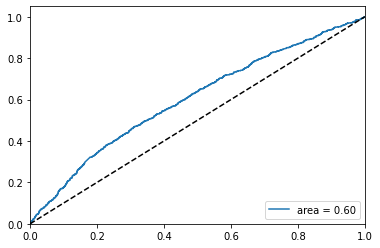

In [63]:
print(np.array(data_vec).shape)
pred_probas = clf.predict_proba(data_vec)[:,1]
print(pred_probas.shape)
fpr,tpr,_ = metrics.roc_curve(data_label,pred_probas)
roc_auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr, label = 'area = %.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc = 'lower right')
plt.show()

In [65]:
joblib.dump(clf,'semi_mode.m')

['semi_mode.m']